Regulatory Affairs of Road Accident Data 2020 India

Step 1: Load the Dataset

In [28]:
import pandas as pd

# Load the dataset
file_path = 'Regulatory_Affairs_of_Road_Accident_Data_2020India.csv'
df = pd.read_csv(file_path)

# Display basic info to understand the structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB
None
  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1     

Step 2: Clean the Dataset

In [29]:
# Remove leading/trailing spaces in string columns
df['Outcome of Incident'] = df['Outcome of Incident'].str.strip()

# Convert the 'Count' column to numeric, replacing invalid values with NaN
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')


Step 3: Identify Cities with the Highest Number of Accidents



In [30]:
# Filter rows where the Outcome of Incident is 'Total number of Accidents'
filtered_accidents = df[df['Outcome of Incident'] == 'Total number of Accidents']

# Group by city and sum the 'Count' column
city_accidents = filtered_accidents.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

# Display top cities by accidents
print(city_accidents.head(10))


Million Plus Cities
Chennai      26334.0
Delhi        25068.0
Bengaluru    19398.0
Jabalpur     19356.0
Indore       18216.0
Bhopal       13770.0
Hyderabad    12384.0
Jaipur       11640.0
Mumbai       10872.0
Gwalior      10794.0
Name: Count, dtype: float64


Step 4: Highlight the Most Common Causes of Accidents

In [31]:
# Group by 'Cause Category' and sum the 'Count' column
cause_category = df.groupby('Cause category')['Count'].sum().sort_values(ascending=False)

# Display the most common causes of accidents
print(cause_category)


Cause category
Junction                    173308.0
Road Features               173308.0
Traffic Control             173308.0
Traffic Violation           173308.0
Weather                     173308.0
Impacting Vehicle/Object    122793.0
Name: Count, dtype: float64


Step 5: Analyze Relationship Between Causes and Outcomes

In [32]:
# Group by 'Cause Category' and 'Outcome of Incident' and sum 'Count'
cause_outcome = df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack(fill_value=0)

# Display the first few rows of the relationship
print(cause_outcome.head())


Outcome of Incident       Greviously Injured  Minor Injury  Persons Killed  \
Cause category                                                               
Impacting Vehicle/Object             20532.0       29983.0         13542.0   
Junction                             20532.0       29983.0         13542.0   
Road Features                        20532.0       29983.0         13542.0   
Traffic Control                      20532.0       29983.0         13542.0   
Traffic Violation                    20532.0       29983.0         13542.0   

Outcome of Incident       Total Injured  Total number of Accidents  
Cause category                                                      
Impacting Vehicle/Object            0.0                    58736.0  
Junction                        50515.0                    58736.0  
Road Features                   50515.0                    58736.0  
Traffic Control                 50515.0                    58736.0  
Traffic Violation               50515.0

Step 6: Visualizations
6.1 Top Cities by Accidents

C:\Users\arpit\AppData\Local\Temp\ipykernel_17116\1906084577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


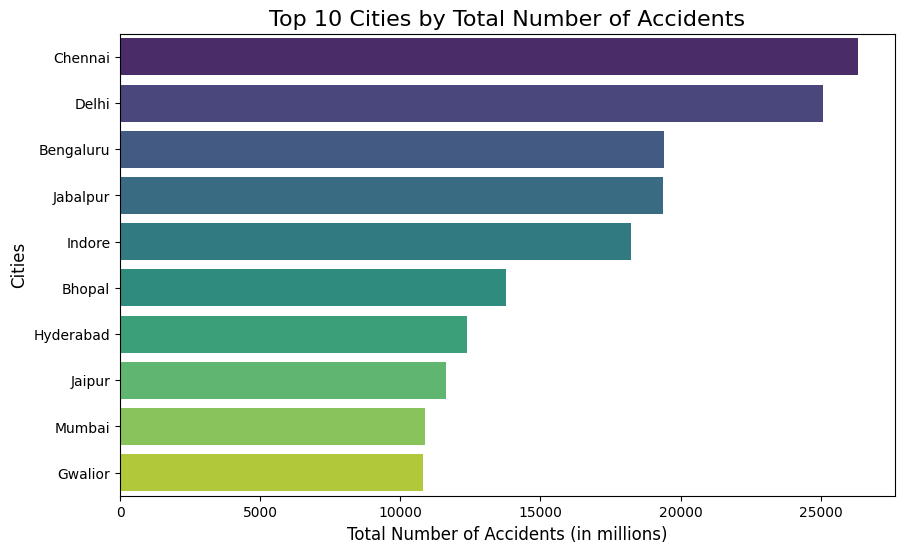

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for top cities
top_cities = city_accidents.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 10 Cities by Total Number of Accidents", fontsize=16)
plt.xlabel("Total Number of Accidents (in millions)", fontsize=12)
plt.ylabel("Cities", fontsize=12)
plt.show()


6.2 Most Common Causes of Accidents

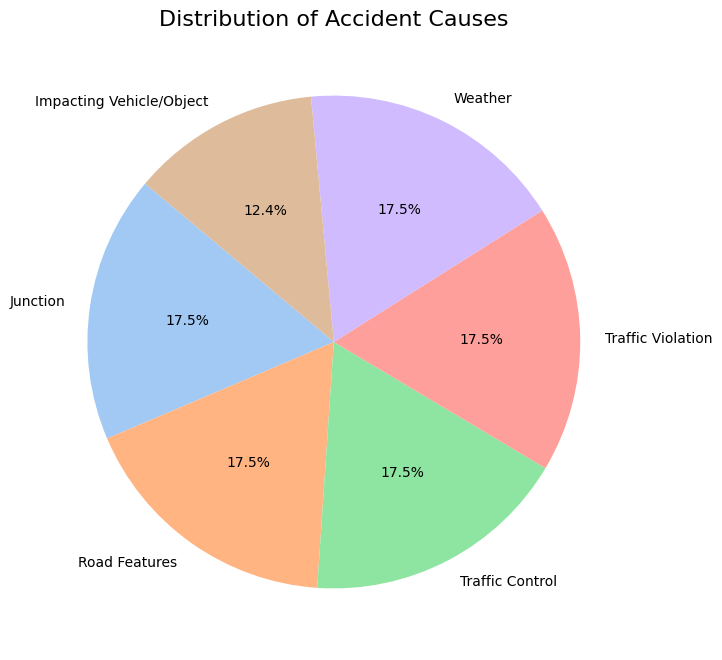

In [34]:
# Pie chart for cause categories
plt.figure(figsize=(8, 8))
cause_category.plot(kind="pie", autopct="%.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Accident Causes", fontsize=16)
plt.ylabel("")  # Hide y-label for better visualization
plt.show()


6.3 Relationship Between Causes and Outcomes


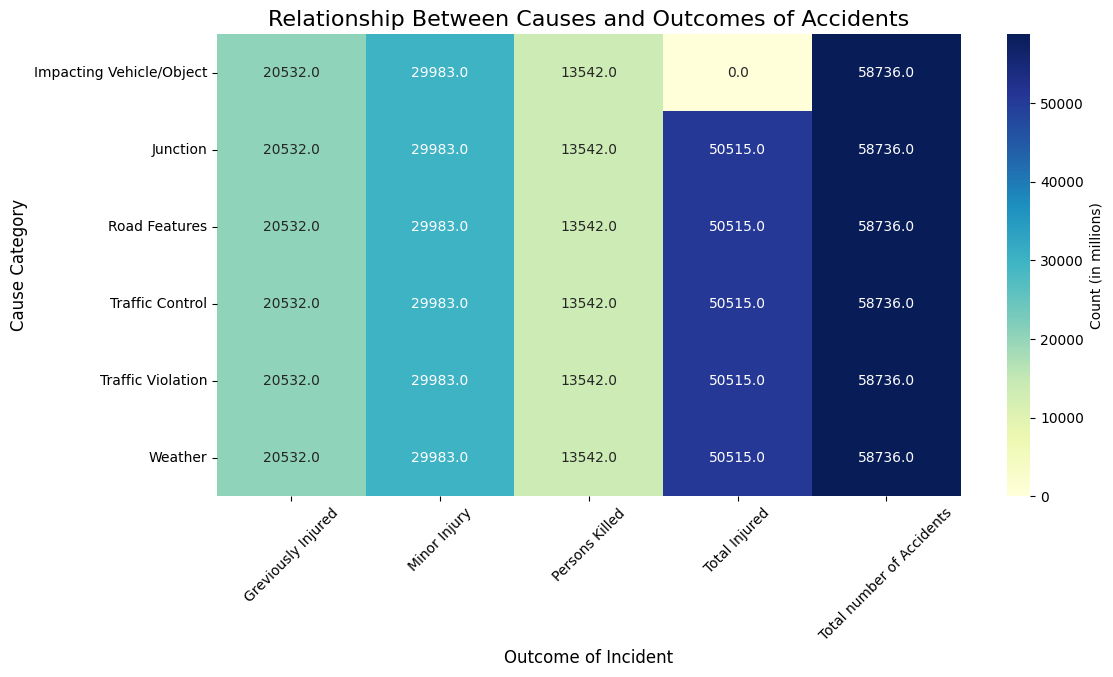

In [35]:
# Heatmap for relationship between causes and outcomes
plt.figure(figsize=(12, 6))
sns.heatmap(cause_outcome, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Count (in millions)'})
plt.title("Relationship Between Causes and Outcomes of Accidents", fontsize=16)
plt.xlabel("Outcome of Incident", fontsize=12)
plt.ylabel("Cause Category", fontsize=12)
plt.xticks(rotation=45)
plt.show()
